In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

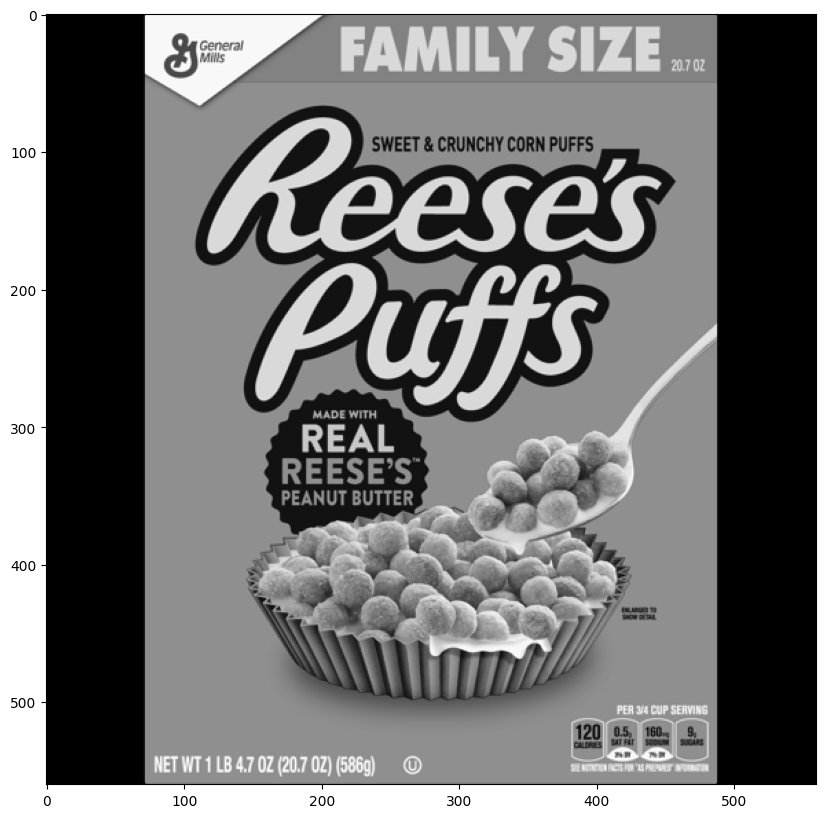

In [4]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)
display(reeses)

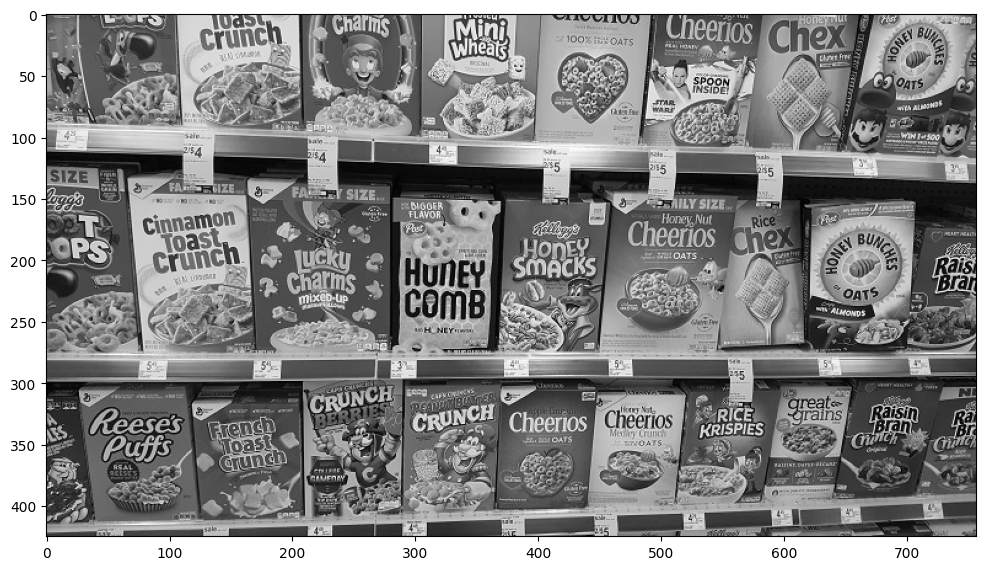

In [5]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cereals)

In [9]:
orb = cv2.ORB_create()

In [11]:
kp1,des1 = orb.detectAndCompute(reeses, None)
kp2,des2 = orb.detectAndCompute(cereals, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

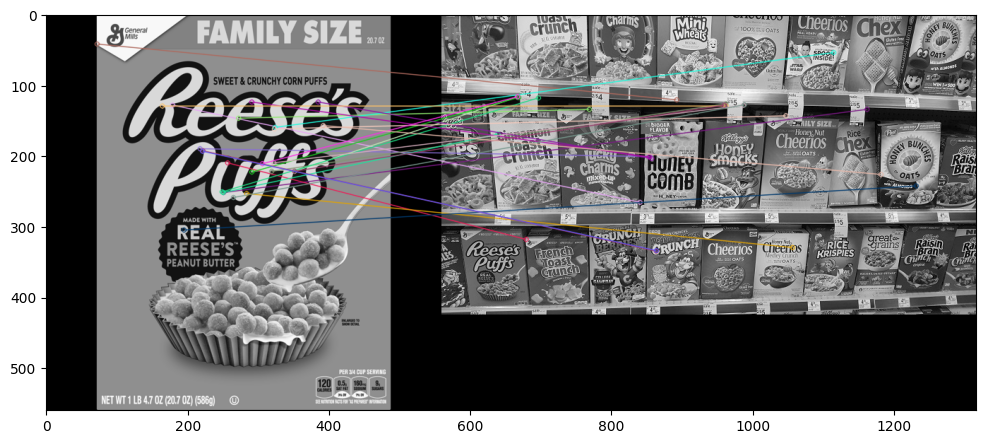

In [12]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags = 2)
display(reeses_matches)

In [7]:
sift = cv2.SIFT_create()

In [10]:
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)

In [11]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [13]:
good = []
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

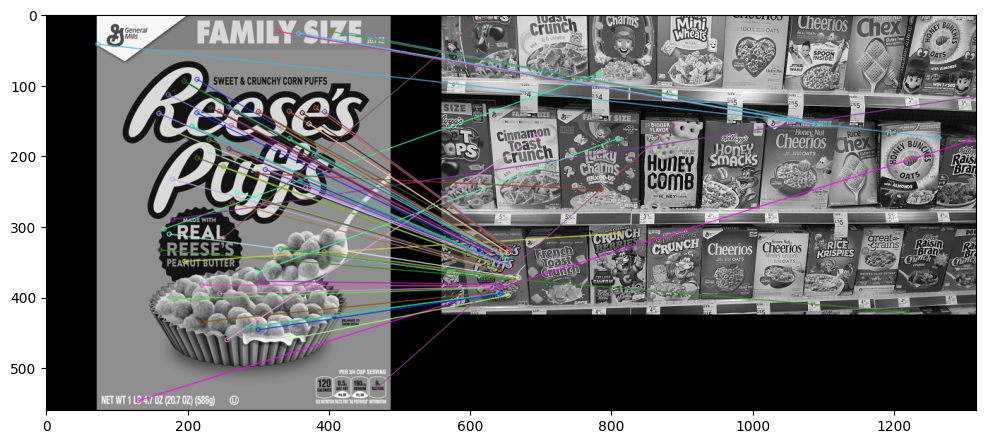

In [15]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

In [25]:
sift = cv2.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)

In [26]:
# FLANN - finds general good matches. Its faster than brute force
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [27]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [29]:
matches = flann.knnMatch(des1, des2, k=2)
matchesMask = [[0,0] for i in range(len(matches))]

# good = []
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        #good.append([match1])
        matchesMask[i] = [1,0]


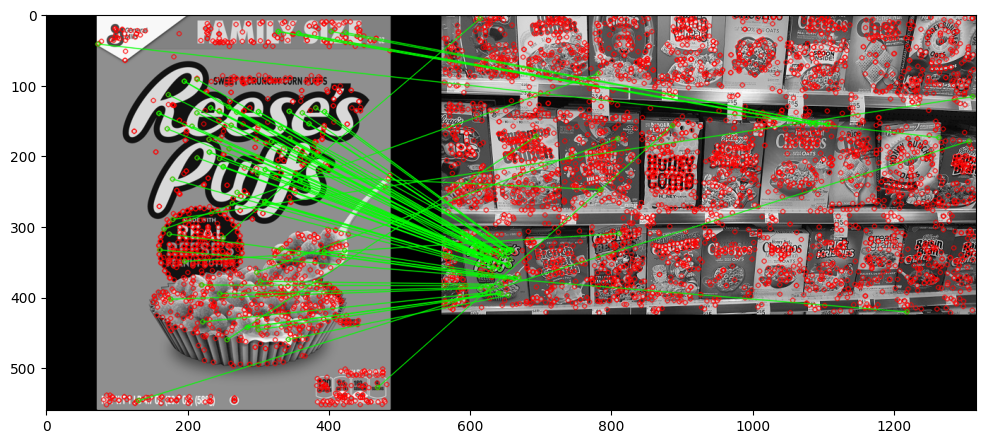

In [30]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)
# flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)